### Column Descriptions:

- **Income:** Two classes (<=50K, >50K)
- **Age:** Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **Fnlwgt:** Continuous.
- **Education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **Education-num:** Continuous.
- **Marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **Occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex:** Female, Male.
- **Capital-gain:** Continuous.
- **Capital-loss:** Continuous.
- **Hours-per-week:** Continuous.
- **Native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



**1)** Explaratory Data Analysis.

In [1573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau


##### Cleaning Data

In [1574]:
df= pd.read_csv("income_evaluation.csv")
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1575]:
print(df.info())
print(f"Datset Shape : {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
Datset Shape : (32561, 15)


In [1576]:
#Removing whitespaces found in the cols names and from the strings in the dataset
df.columns = [col.strip() for col in df.columns]
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [1577]:
df["income"]=df["income"].replace(['<=50K','>50K'],[0,1])
df["income"].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

##### Numerical Cols Analysis and Cleaning

In [1578]:
df.describe(include=np.number).drop("income",axis=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


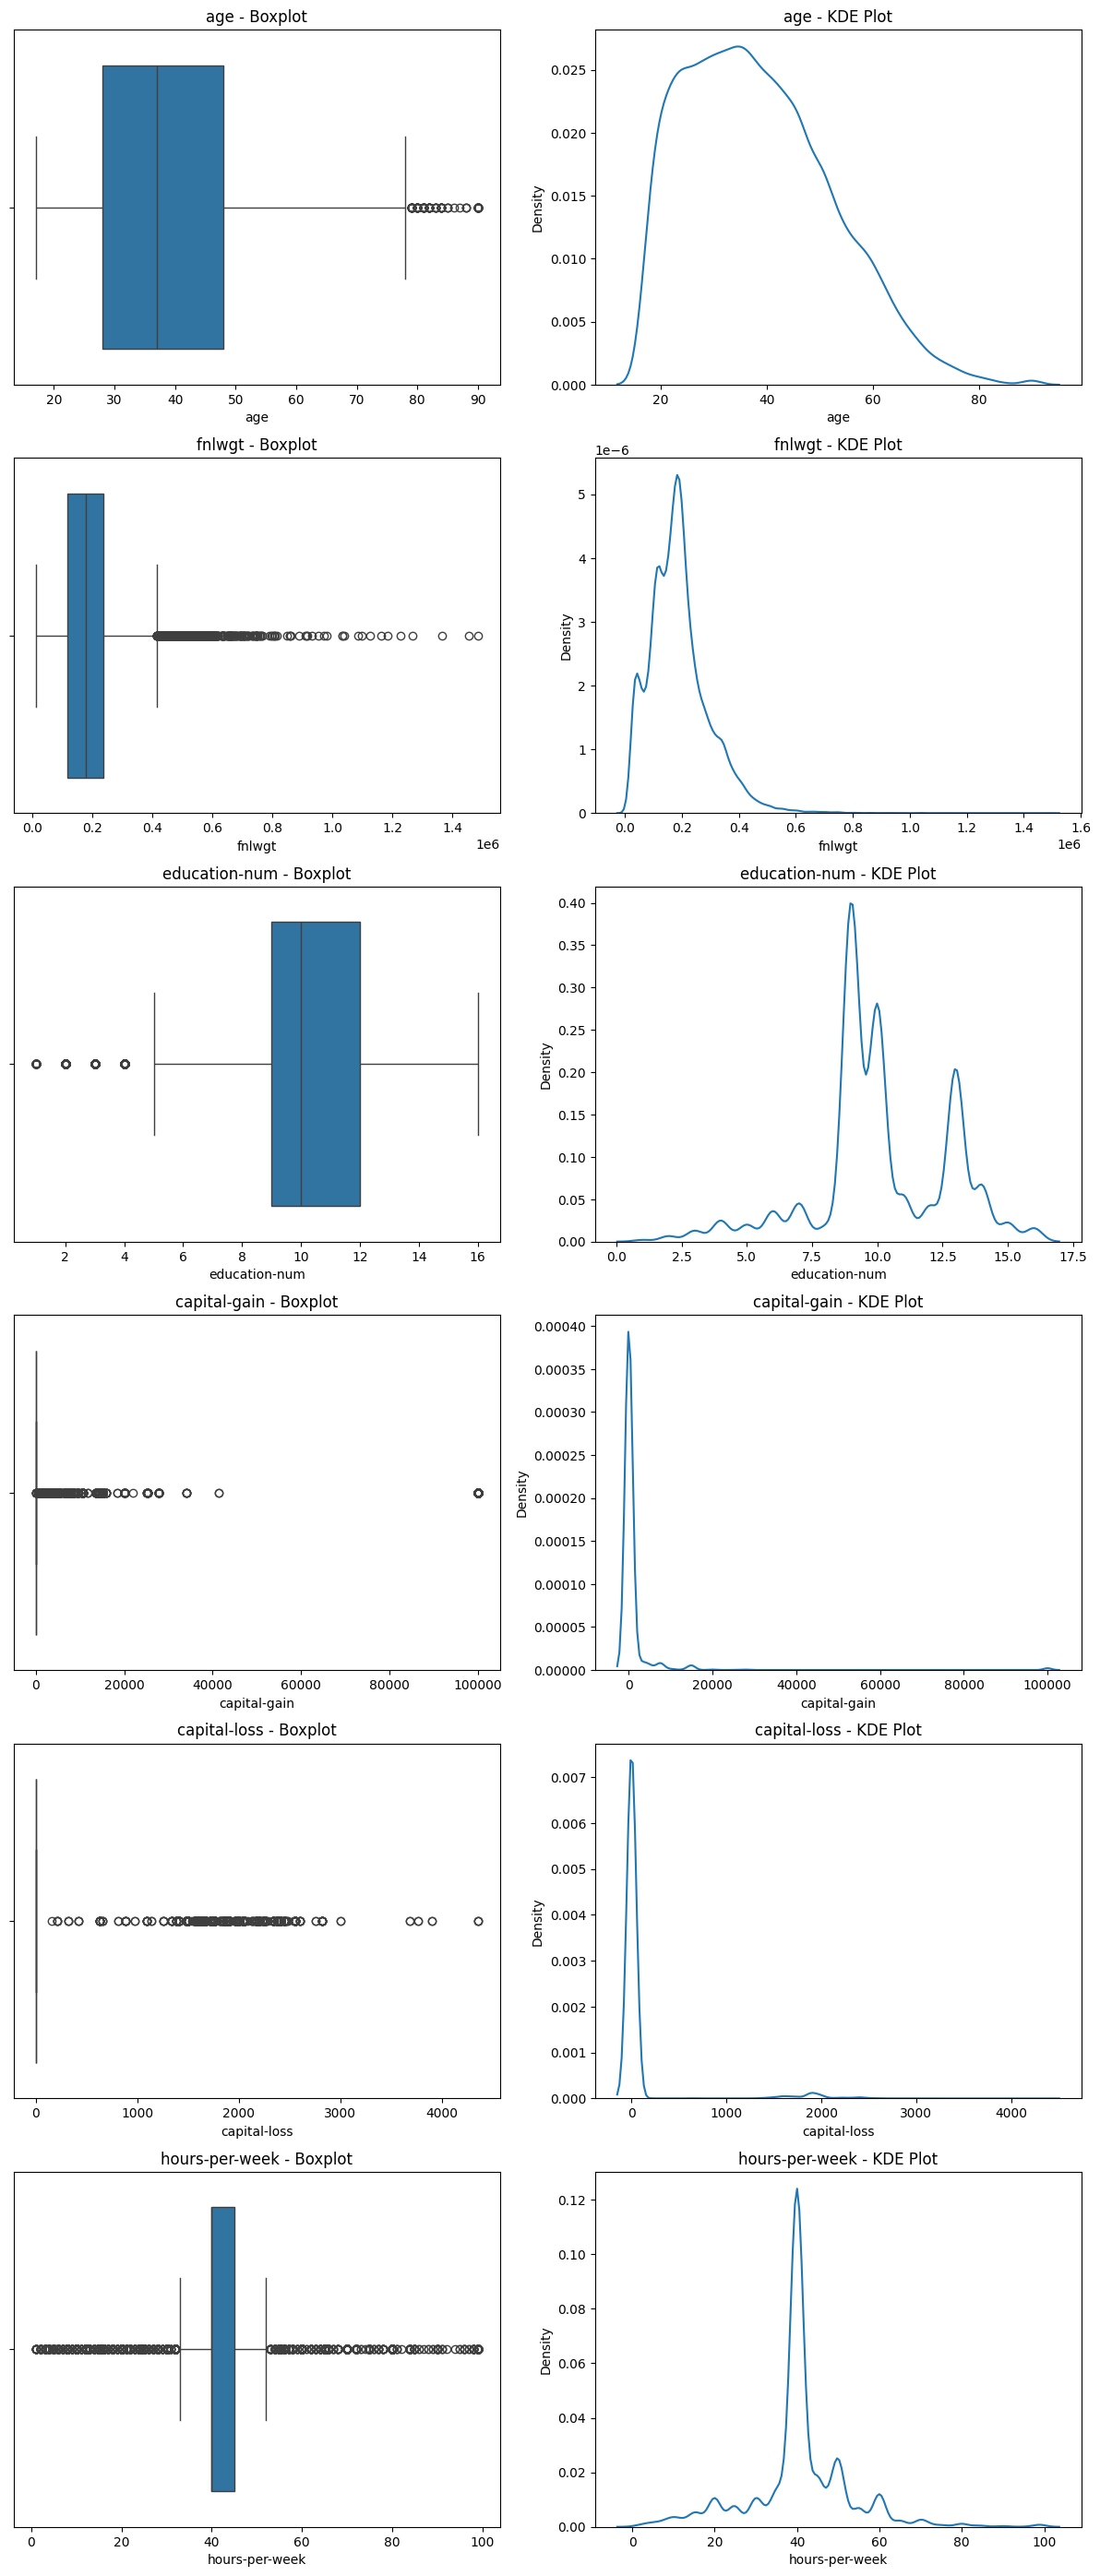

In [1579]:
numerical_cols = list(df.select_dtypes(['float', 'int64']).drop("income",axis=1))
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,28))
for i,x in enumerate(numerical_cols):
    sns.boxplot(df[x],ax=ax[i,0],orient='h')
    sns.kdeplot(df[x],ax=ax[i,1])
    ax[i, 0].set_title(f'{x} - Boxplot')
    ax[i, 1].set_title(f'{x} - KDE Plot')
    plt.tight_layout(pad=1.0)

In [1580]:
#Keeping them because loosing them would lead to a significant loss of valuable information so we dont drop them
Q3=df["hours-per-week"].quantile(0.75)
Q1=df["hours-per-week"].quantile(0.25)
IQR = Q3-Q1
above_outlier= df[df["hours-per-week"]> 1.5*IQR+Q3]
below_outlier= df[df["hours-per-week"]< Q1-1.5*IQR]
print(f"num of instances above outlier hours of work = {above_outlier.shape[0]}")
print(f"num of instances below outlier hours of work = {below_outlier.shape[0]}")
print(f'Percentage of outlier compared to whole dataset = {((len(below_outlier)+ len(above_outlier))/len(df["hours-per-week"]))*100}')

num of instances above outlier hours of work = 3492
num of instances below outlier hours of work = 5516
Percentage of outlier compared to whole dataset = 27.664998003746817


In [1581]:
#New Feature extracted fomr capital gain and capital loss that calle capital status 
#capital status = either the capital loss is above zero or capital gain above zero or both zero  indicating if there was a profit or loss or none 
df["capital_status"] = df.apply(lambda row: 
    "No Transaction" if row["capital-gain"] == 0 and row["capital-loss"] == 0 else
    "Profit" if row["capital-gain"] > 0 and row["capital-loss"] == 0 else
    "Loss", axis=1
)


##### Handle missing values

In [1583]:
#There is no missing values in our Dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
capital_status    0
dtype: int64

In [1584]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
capital_status    object
dtype: object

In [1585]:
print(f'{df["workclass"].value_counts()}')
#Having ? in workclass we want to see how it impact on the target

print("Workclass ? in income ")
print(df[df["workclass"]==" ?"]["income"].value_counts())
print("income distribution betweeen the two classes")
print(print(df["income"].value_counts()))
#the size of ? is really small compared to the dataset and does not effect the dataset so we drop them

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Workclass ? in income 
Series([], Name: count, dtype: int64)
income distribution betweeen the two classes
income
0    24720
1     7841
Name: count, dtype: int64
None


In [1586]:
df= df.drop(df[df["workclass"]=="?"].index,axis=0)
#in occuption and native country the same ? is there so we drop them
df= df.drop(df[df["occupation"]=="?"].index,axis=0)
df= df.drop(df[df["native-country"]=="?"].index,axis=0)


##### Correlation and Feature Selection

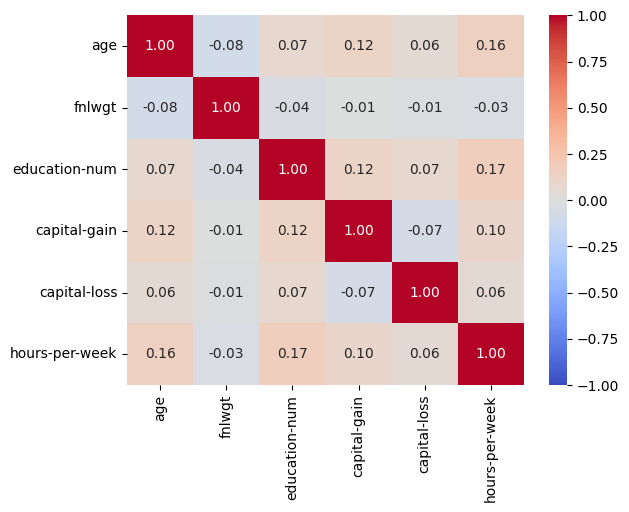

In [1587]:
#no multicollinearity between features so we cant drop one of the features
corr_matrix = df[numerical_cols].corr(method= "spearman")
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [1588]:
#Chi test for the categorical features with the target
categorical_features = df.select_dtypes(['object']).columns
chi2_results = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({"Feature": feature, "Chi2 Statistic": chi2, "P-value": p, "Significant": p < 0.05})

chi2_df = pd.DataFrame(chi2_results)
print(chi2_df)
#The table below shows that the p value is less than 0.05 in chi squrae test and all of the categorical features are important


          Feature  Chi2 Statistic        P-value  Significant
0       workclass      804.157527  1.946096e-170         True
1       education     4070.381622   0.000000e+00         True
2  marital-status     6061.747963   0.000000e+00         True
3      occupation     3687.620651   0.000000e+00         True
4    relationship     6233.840454   0.000000e+00         True
5            race      304.241374   1.317829e-64         True
6             sex     1415.286404  1.001553e-309         True
7  native-country      317.736675   6.221222e-45         True
8  capital_status     2871.063862   0.000000e+00         True


In [1589]:
#kendell test for the numerical features with the target
kendell_results = []
for feature in numerical_cols:
    tau, p_value = kendalltau(df[feature], df['income'])
    kendell_results.append({"Feature": feature, "Kendall's Tau": tau, "P-value": p_value, "Significant": p_value < 0.05})
kendell_df = pd.DataFrame(kendell_results)
print(kendell_df)

#The results below shows that fnlwgt column does not have

          Feature  Kendall's Tau        P-value  Significant
0             age       0.228446   0.000000e+00         True
1          fnlwgt      -0.008193   8.141504e-02        False
2   education-num       0.292095   0.000000e+00         True
3    capital-gain       0.272393   0.000000e+00         True
4    capital-loss       0.138703  4.507802e-131         True
5  hours-per-week       0.237025   0.000000e+00         True


In [1590]:
df =df.drop("fnlwgt",axis=1)

In [1591]:
print(df["education"].unique())
print(df["education-num"].unique())
#removing eduction num because it is the same as eduction but with number (duplicate info)
df=df.drop("education-num",axis=1)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


##### Object Cols Analysis and Cleaning

In [1592]:
df.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,capital_status
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,3
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,No Transaction
freq,22286,9840,14065,4038,12463,25933,20380,27504,26197


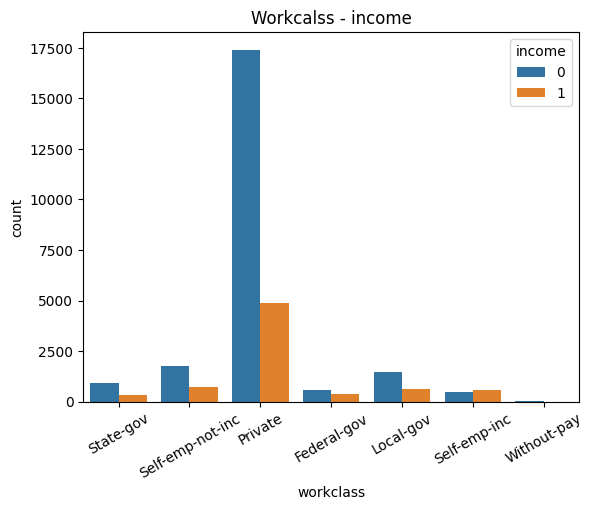

In [1593]:
sns.countplot(data=df,x="workclass",hue="income")
plt.xticks(rotation=30)
plt.title("Workcalss - income")
plt.show()

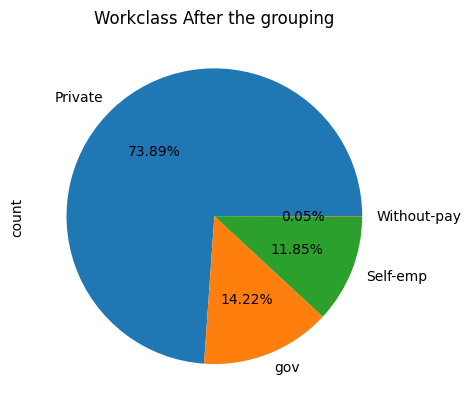

In [1594]:
# the gov workclass gives the same behaviour so we group them and self employed as another group
df["workclass"]=df["workclass"].replace(["Local-gov","State-gov","Federal-gov"],"gov")
df["workclass"]=df["workclass"].replace(["Self-emp-not-inc","Self-emp-inc"],"Self-emp")
worclass_count = df["workclass"].value_counts()
worclass_count.plot(kind="pie",autopct='%1.2f%%')
plt.title("Workclass After the grouping")
plt.show()

In [1595]:
#United States is the dominant category, while other countries have much smaller counts so we can comine them as non-united states
print(df["native-country"].value_counts())
df['native-country'] = df['native-country'].apply(lambda x: 'United States' if x == 'United-States' else 'Other')


native-country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

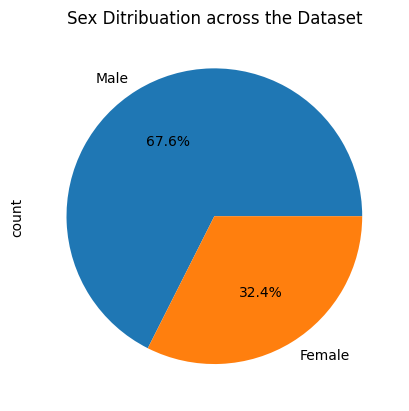

In [1596]:
sex_count= df["sex"].value_counts()
sex_count.plot(kind="pie",autopct='%1.1f%%')
plt.title("Sex Ditribuation across the Dataset")
plt.show()

In [1597]:
df["occupation"].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [1598]:
#Making the occuption less when we encode it by group based on the similar background of each one 
occupation_mapping = {
    'Prof-specialty': 'Professional & Administrative',
    'Exec-managerial': 'Professional & Administrative',
    'Adm-clerical': 'Professional & Administrative',
    'Tech-support': 'Professional & Administrative',
    
    'Craft-repair': 'Skilled & Labor-intensive',
    'Machine-op-inspct': 'Skilled & Labor-intensive',
    'Transport-moving': 'Skilled & Labor-intensive',
    'Farming-fishing': 'Skilled & Labor-intensive',

    'Sales': 'Service',
    'Other-service': 'Service',
    'Protective-serv': 'Service',
    'Priv-house-serv': 'Service',

    'Handlers-cleaners': 'Manual',
    'Armed-Forces': 'Manual'
}

df['occupation'] = df['occupation'].map(occupation_mapping)


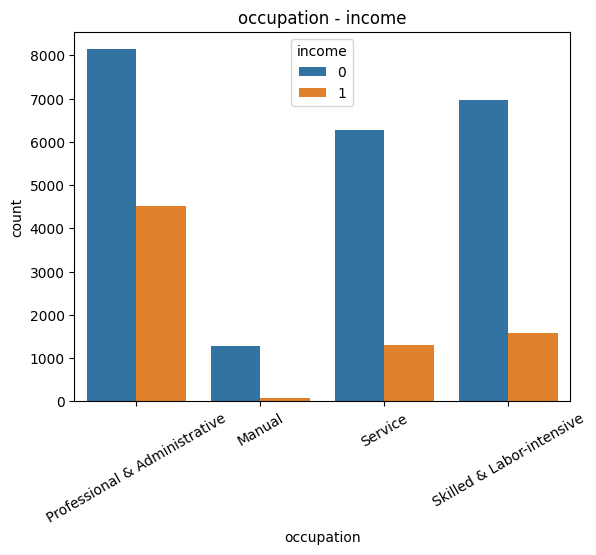

In [1648]:
sns.countplot(data=df,x="occupation",hue="income")
plt.xticks(rotation=30)
plt.title("occupation - income")
plt.show()

In [1600]:
df["education"].value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [1601]:
#Transforming the edcuation into smaller groups because we need to make the one hot encoding feature less for training 
education_mapping = {
    'HS-grad': 'High School',
    'Some-college': 'Some College',
    'Assoc-acdm': 'Some College',
    'Assoc-voc': 'Some College',
    'Bachelors': "Bachelor's",
    'Masters': 'Higher Education',
    'Prof-school': 'Higher Education',
    'Doctorate': 'Higher Education',
    '11th': 'Low Education',
    '10th': 'Low Education',
    '7th-8th': 'Low Education',
    '9th': 'Low Education',
    '12th': 'Low Education',
    '5th-6th': 'Low Education',
    '1st-4th': 'Low Education',
    'Preschool': 'Low Education'
}

# Apply the mapping to the education column
df['education'] = df['education'].map(education_mapping)


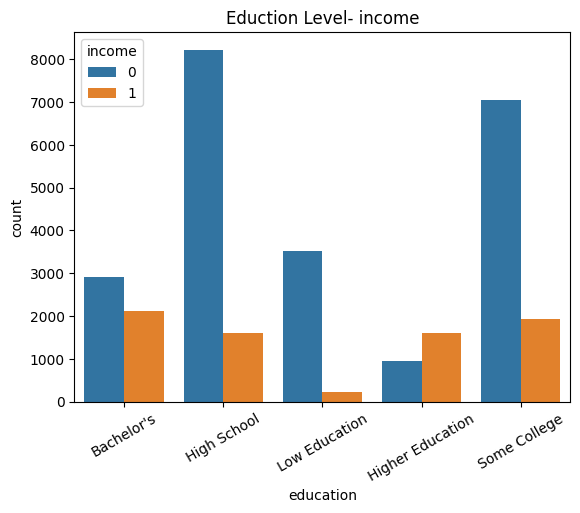

In [1602]:
sns.countplot(data=df,x="education",hue="income")
plt.xticks(rotation=30)
plt.title("Eduction Level- income")
plt.show()

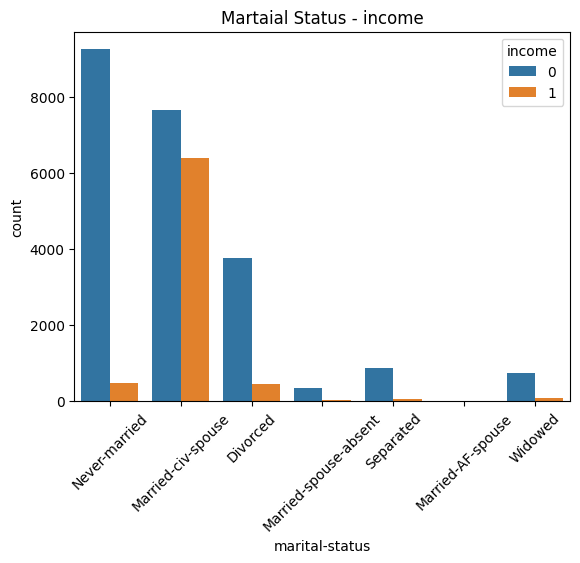

In [1603]:
sns.countplot(data=df,x="marital-status",hue="income")
plt.xticks(rotation=45)
plt.title("Martaial Status - income")
plt.show()

In [1604]:
# Combining married-civ-spouse and married-spouse-absent and married-af-spouse together
# Combining Divorced and Seperated and any other categories the same
df["marital-status"]=df["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],"Married")
df["marital-status"]=df["marital-status"].replace(['Divorced','Separated'],'Divorced/Separated')
df["marital-status"].value_counts()

marital-status
Married               14456
Never-married          9726
Divorced/Separated     5153
Widowed                 827
Name: count, dtype: int64

In [1605]:
df["race"].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

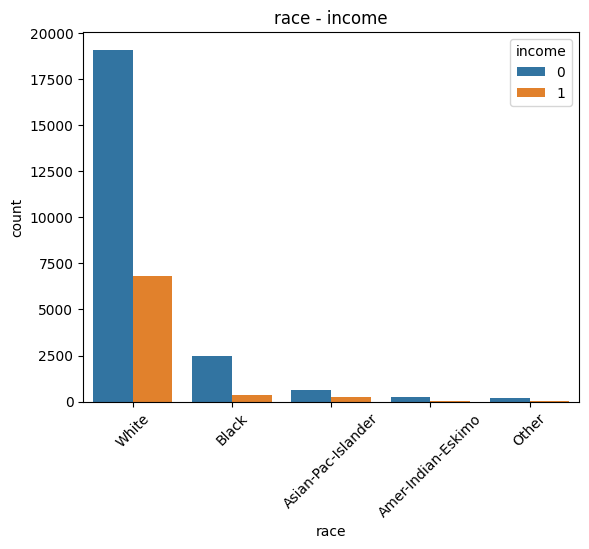

In [1606]:
sns.countplot(data=df,x="race",hue="income")
plt.xticks(rotation=45)
plt.title("race - income")
plt.show()

####

**2)** Model Building

In [1607]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


In [1608]:
#df = df.drop(columns=["native-country"],axis=1)
#"relationship",


In [1609]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_status
0,39,gov,Bachelor's,Never-married,Professional & Administrative,Not-in-family,White,Male,2174,0,40,United States,0,Profit
1,50,Self-emp,Bachelor's,Married,Professional & Administrative,Husband,White,Male,0,0,13,United States,0,No Transaction
2,38,Private,High School,Divorced/Separated,Manual,Not-in-family,White,Male,0,0,40,United States,0,No Transaction
3,53,Private,Low Education,Married,Manual,Husband,Black,Male,0,0,40,United States,0,No Transaction
4,28,Private,Bachelor's,Married,Professional & Administrative,Wife,Black,Female,0,0,40,Other,0,No Transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Some College,Married,Professional & Administrative,Wife,White,Female,0,0,38,United States,0,No Transaction
32557,40,Private,High School,Married,Skilled & Labor-intensive,Husband,White,Male,0,0,40,United States,1,No Transaction
32558,58,Private,High School,Widowed,Professional & Administrative,Unmarried,White,Female,0,0,40,United States,0,No Transaction
32559,22,Private,High School,Never-married,Professional & Administrative,Own-child,White,Male,0,0,20,United States,0,No Transaction


In [1610]:
sss=StratifiedKFold(n_splits=6, random_state=42, shuffle=True)
for train,test in sss.split(df,df['income']):
    train_set =df.iloc[train]
    test_set  =df.iloc[test]

print('train_set = ',len(train_set))
print('test_set  = ',len(test_set))

x_test = test_set.drop('income',axis=1)
y_test = test_set['income'].copy()
x_train = train_set.drop('income',axis=1)
y_train = train_set['income'].copy()


train_set =  25135
test_set  =  5027


##### Preprocessing

In [1611]:
education_order = {
    'Low Education': 1,
    'High School': 2,
    'Some College': 3,
    "Bachelor's": 4,
    'Higher Education': 5
}
x_train["education"]=x_train["education"].map(education_order)
x_test["education"]=x_test["education"].map(education_order)

In [1612]:
x_train

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital_status
0,39,gov,4,Never-married,Professional & Administrative,Not-in-family,White,Male,2174,0,40,United States,Profit
2,38,Private,2,Divorced/Separated,Manual,Not-in-family,White,Male,0,0,40,United States,No Transaction
3,53,Private,1,Married,Manual,Husband,Black,Male,0,0,40,United States,No Transaction
5,37,Private,5,Married,Professional & Administrative,Wife,White,Female,0,0,40,United States,No Transaction
6,49,Private,1,Married,Service,Not-in-family,Black,Female,0,0,16,Other,No Transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,3,Married,Professional & Administrative,Wife,White,Female,0,0,38,United States,No Transaction
32557,40,Private,2,Married,Skilled & Labor-intensive,Husband,White,Male,0,0,40,United States,No Transaction
32558,58,Private,2,Widowed,Professional & Administrative,Unmarried,White,Female,0,0,40,United States,No Transaction
32559,22,Private,2,Never-married,Professional & Administrative,Own-child,White,Male,0,0,20,United States,No Transaction


In [1613]:
ordinal_features = ['education',"sex"]
oneHot_features = ['workclass','marital-status','occupation',"race","relationship","native-country","capital_status"]
Standard_features = ['age','hours-per-week','capital-loss',"capital-gain"]

In [1614]:
full_pipeline = ColumnTransformer([
    ('Standard', StandardScaler(), Standard_features),
    ('OneHot',OneHotEncoder(sparse_output=False),oneHot_features),
    ('Ordinal',OrdinalEncoder(),ordinal_features)
])
x_train= full_pipeline.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns= full_pipeline.get_feature_names_out())

x_test= full_pipeline.transform(x_test)
x_test=pd.DataFrame(x_test,columns= full_pipeline.get_feature_names_out())
full_pipeline.get_feature_names_out()



array(['Standard__age', 'Standard__hours-per-week',
       'Standard__capital-loss', 'Standard__capital-gain',
       'OneHot__workclass_Private', 'OneHot__workclass_Self-emp',
       'OneHot__workclass_Without-pay', 'OneHot__workclass_gov',
       'OneHot__marital-status_Divorced/Separated',
       'OneHot__marital-status_Married',
       'OneHot__marital-status_Never-married',
       'OneHot__marital-status_Widowed', 'OneHot__occupation_Manual',
       'OneHot__occupation_Professional & Administrative',
       'OneHot__occupation_Service',
       'OneHot__occupation_Skilled & Labor-intensive',
       'OneHot__race_Amer-Indian-Eskimo',
       'OneHot__race_Asian-Pac-Islander', 'OneHot__race_Black',
       'OneHot__race_Other', 'OneHot__race_White',
       'OneHot__relationship_Husband',
       'OneHot__relationship_Not-in-family',
       'OneHot__relationship_Other-relative',
       'OneHot__relationship_Own-child', 'OneHot__relationship_Unmarried',
       'OneHot__relationship_Wife',

In [1615]:
y_train.value_counts()

income
0    18879
1     6256
Name: count, dtype: int64

In [1616]:
x_train.shape

(25135, 34)

In [1617]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

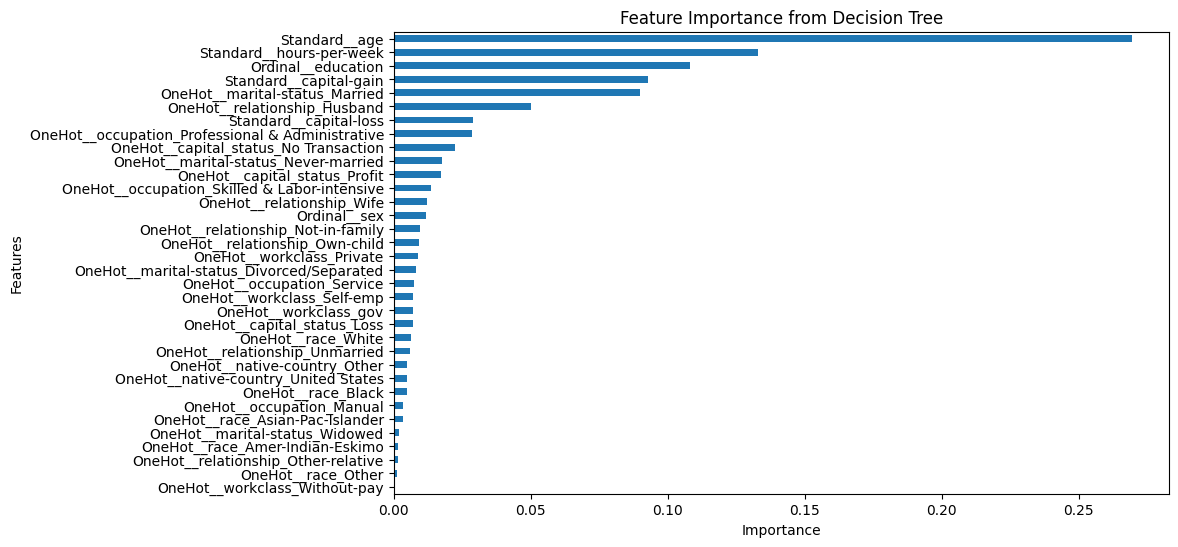

In [1618]:
feature_importance = pd.Series(rf.feature_importances_, index=x_train.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [1619]:
important_features = feature_importance.nlargest(25).index

x_train_reduced = x_train[important_features]
x_test_reduced = x_test[important_features]


In [1620]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_ratio)



[0.19632612 0.33753496 0.46287644 0.57204454 0.67834487 0.74380095
 0.77649171 0.80740669 0.83759751 0.86141559 0.88422544 0.90360242
 0.92117517 0.93644628 0.95003224 0.96273665 0.97249013 0.97901949
 0.98457131 0.98863565 0.99257727 0.99619521]


In [1621]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':[5,7,9,11] ,
            'weights' :['uniform', 'distance'],
            "metric":["minkowski","manhattan"]
            }
knn_cv=GridSearchCV(knn,knn_param,cv=5,scoring='accuracy',n_jobs=-1)
knn_cv.fit(x_train_pca ,y_train)
print(f"Best Parameters : {knn_cv.best_params_}")

Best Parameters : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [1622]:
print("Accurracy on Training set = " , knn_cv.best_score_)
knn = knn_cv.best_estimator_

Accurracy on Training set =  0.8347324447980903


In [1623]:
from sklearn.svm import SVC
svc = SVC()
svc_param =  [
    {'C': [0.1,1,10], 'kernel': ['rbf', 'sigmoid']},
]

svc_cv= RandomizedSearchCV(svc,svc_param,cv=5,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train_pca,y_train)
print(f"Best Parameters : {svc_cv.best_params_}")

c:\Users\HP14\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters : {'kernel': 'rbf', 'C': 1}


In [1624]:
print("Accuracy on Training set = " , svc_cv.best_score_)
svc = svc_cv.best_estimator_

Accuracy on Training set =  0.8498508056494927


In [1625]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_param = {
    'random_state':[1],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf': [2,4,7,10],
}
dtc_cv= RandomizedSearchCV(dtc,dtc_param,cv=5,scoring='accuracy',n_jobs=-1)
dtc_cv.fit(x_train_reduced,y_train)
print(f"Best Parameters : {dtc_cv.best_params_}")

Best Parameters : {'random_state': 1, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}


In [1626]:
print("Accuracy on Training set = " , dtc_cv.best_score_)
dtc = dtc_cv.best_estimator_

Accuracy on Training set =  0.8499303759697632


In [1640]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier()
rfc_param = {"criterion":['gini', 'entropy'],
            "max_depth":[None,10,15,20],
            'min_samples_split': [2,5,7,10],
            'min_samples_leaf': [2,4,7,10],
            'n_estimators':[200,300,400,500],
}
rfc_cv= RandomizedSearchCV(rfc,rfc_param,cv=5,scoring='accuracy',n_jobs=-1)
rfc_cv.fit(x_train_reduced,y_train)
print(f"Best Parameters : {rfc_cv.best_params_}")

Best Parameters : {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'gini'}


In [1641]:
print("Accuracy on Training set = " , rfc_cv.best_score_)
rfc = rfc_cv.best_estimator_

Accuracy on Training set =  0.8581261189576288


**3)** Model Evaluation

In [1642]:
test_pred_knn = knn.predict(x_test_pca)
test_pred_svc= svc.predict(x_test_pca)
test_pred_dtc= dtc.predict(x_test_reduced)
test_pred_rfc= rfc.predict(x_test_reduced)

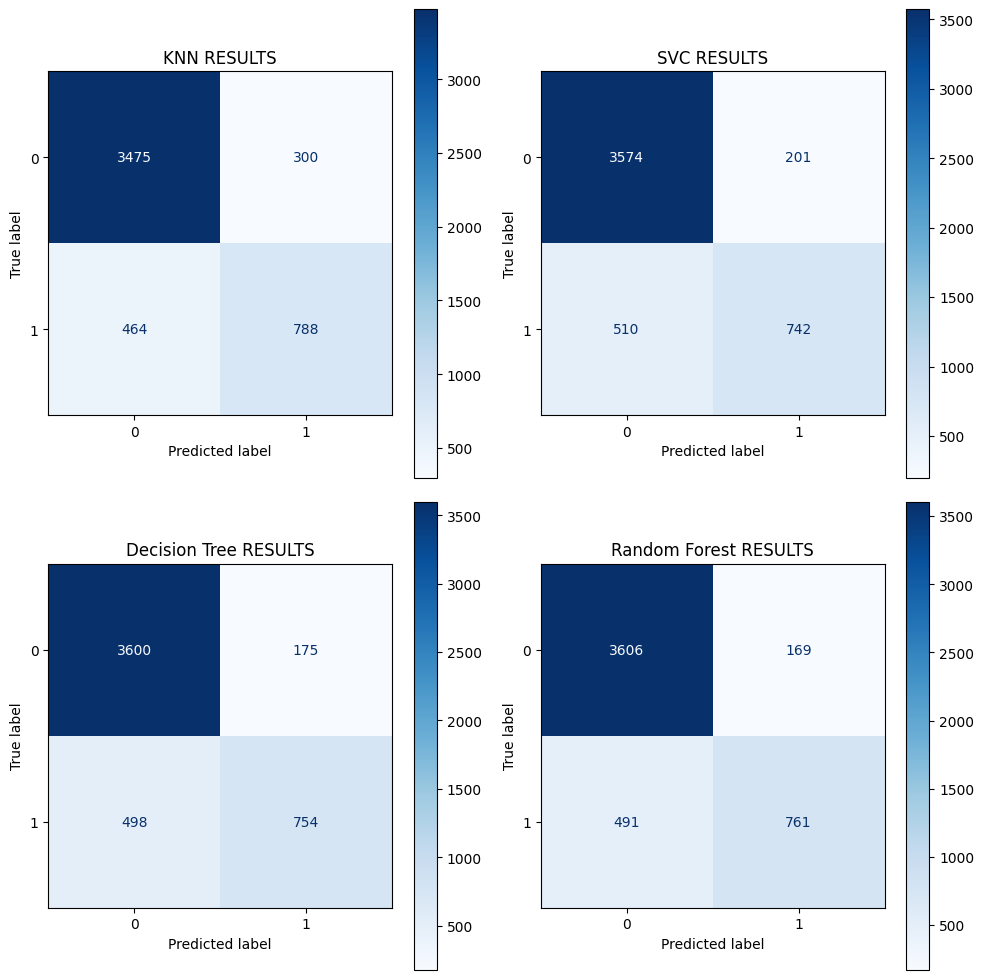

In [1643]:
test_pred = [test_pred_knn, test_pred_svc, test_pred_dtc, test_pred_rfc]
labels = ["KNN RESULTS", "SVC RESULTS", "Decision Tree RESULTS", "Random Forest RESULTS"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i, (pred, label) in enumerate(zip(test_pred, labels)):
    disp =ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='Blues', ax=axes[i])
    axes[i].set_title(label)


plt.tight_layout()
plt.show()

In [1644]:
from sklearn.metrics import classification_report
print("KNN Model :")
print(classification_report(y_test,test_pred_knn))

print("SVC Model :")
print(classification_report(y_test,test_pred_svc))



KNN Model :
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3775
           1       0.72      0.63      0.67      1252

    accuracy                           0.85      5027
   macro avg       0.80      0.77      0.79      5027
weighted avg       0.84      0.85      0.84      5027

SVC Model :
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3775
           1       0.79      0.59      0.68      1252

    accuracy                           0.86      5027
   macro avg       0.83      0.77      0.79      5027
weighted avg       0.85      0.86      0.85      5027



In [1632]:
'''both of the models are good at class 0 where they provide 0.88 and 0.87 precision and high recall, 
in class 1 they have decent precision 0.71 and 0.78 respectivly  and the recall for both of the models is low 0.63 and 0.59  '''

'both of the models are good at class 0 where they provide 0.88 and 0.87 precision and high recall, \nin class 1 they have decent precision 0.71 and 0.78 respectivly  and the recall for both of the models is low 0.63 and 0.59  '

In [1645]:
print("Decision Tree Model :")
print(classification_report(y_test,test_pred_dtc))

print("Random Forest Model :")
print(classification_report(y_test,test_pred_rfc))

Decision Tree Model :
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3775
           1       0.81      0.60      0.69      1252

    accuracy                           0.87      5027
   macro avg       0.85      0.78      0.80      5027
weighted avg       0.86      0.87      0.86      5027

Random Forest Model :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3775
           1       0.82      0.61      0.70      1252

    accuracy                           0.87      5027
   macro avg       0.85      0.78      0.81      5027
weighted avg       0.86      0.87      0.86      5027



In [1646]:
'''both of the models are good at class 0 where they provide high precision and recall, 
in class 1 they have good precision 0.81 and 0.82 which is higher than the other models,recall for both of the models is low 0.60 and 0.61 '''

'both of the models are good at class 0 where they provide high precision and recall, \nin class 1 they have good precision 0.81 and 0.82 which is higher than the other models,recall for both of the models is low 0.60 and 0.61 '